## 🧠 1. Project Introduction

# Financial Analysis of Tech Companies (2020–2024)

This data science project performs a comparative analysis of the stock performance of five major U.S. technology companies — Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Tesla (TSLA), and Alphabet (GOOGL) — from 2020 to 2024.

I will use Python-based tools to:
- Download and clean historical stock data
- Visualize stock price trends and volatility
- Analyze daily returns and correlations
- Provide insights for investors and portfolio strategies

## Problem Statement and Objectives

The objective of this analysis is to understand the behavior of these technology stocks in terms of returns, volatility, risk, and correlation. By doing so, i aim to identify patterns and characteristics that can help investors make informed decisions about portfolio construction and risk management within the technology sector.

This study is particularly relevant for investors looking to balance risk and return by understanding how these key players perform individually and in relation to one another over time.


## 🗂️ 2. Data Collection & Cleaning

In [5]:
!pip install yfinance --quiet

Library imports:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Set visual style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


In [8]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL']

data = yf.download(tickers, start="2020-01-01", end="2025-01-01")['Close']

print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed

Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.620834  94.900497  68.108383  153.042282  28.684000
2020-01-03  71.914825  93.748497  67.752075  151.136642  29.534000
2020-01-06  72.487862  95.143997  69.557945  151.527298  30.102667
2020-01-07  72.146957  95.343002  69.423592  150.145752  31.270666
2020-01-08  73.307503  94.598503  69.917725  152.537338  32.809334


### Data cleaning
We checked for missing values to ensure data completeness. No null values were found across all tickers, so no imputation or removal was necessary.

In [10]:
# Check for null values in the dataset
null_counts = data.isnull().sum()
print("Null values per ticker:\n", null_counts)

# Show if there are rows with null values
print("\nTotal null values:", data.isnull().values.sum())


Null values per ticker:
 Ticker
AAPL     0
AMZN     0
GOOGL    0
MSFT     0
TSLA     0
dtype: int64

Total null values: 0


In [11]:
data.to_csv('data/cleaned_stock_data.csv')

## 📊 3. Exploratory Data Analysis (EDA)

## 3.1 Historical prices

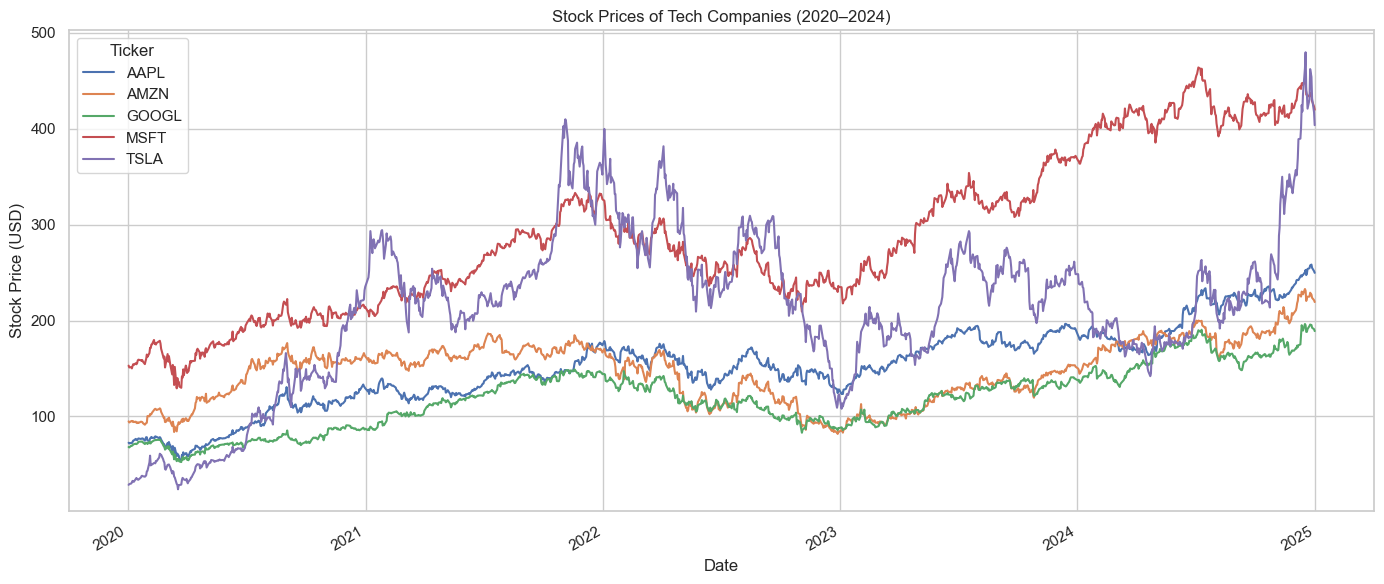

In [14]:
import os
import matplotlib.pyplot as plt

# Create folder inside the project
os.makedirs('outputs_graficos_eda', exist_ok=True)

# Graph historical prices
data.plot(title='Stock Prices of Tech Companies (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend(title='Ticker')
plt.tight_layout()

# Save plots in outputs.graficos_eda
plt.savefig('outputs_graficos_eda/precios_historicos_tech.png')

plt.show()

## Daily returns

In [16]:
import os

# Create folders inside the project
os.makedirs('data/stocks', exist_ok=True)
os.makedirs('data/etf', exist_ok=True)
os.makedirs('data/crypto', exist_ok=True)

# Calculate daily returns
returns = data.pct_change().dropna()

# Save datasets in the corresponding folders inside the project
data.to_csv('data/stocks/tech_stocks.csv')
returns.to_csv('data/stocks/tech_returns.csv')

print("Files saved successfully inside 'data/stocks'")

Files saved successfully inside 'data/stocks'


## 3.2 Boxplots of daily returns & Sharpe ratio per year

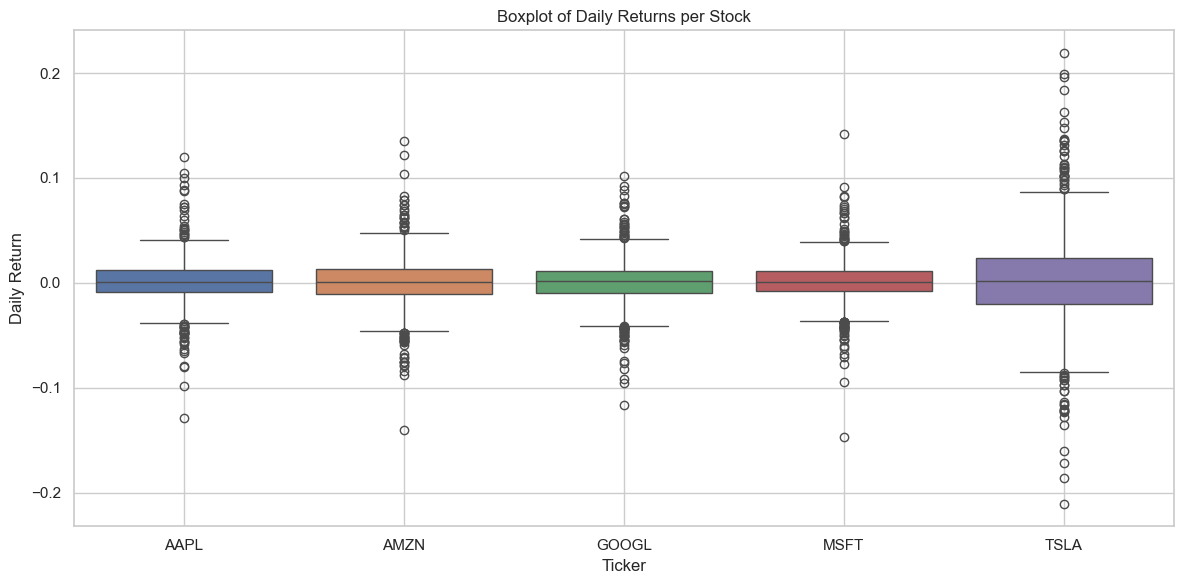

Ticker  AAPL  AMZN  GOOGL  MSFT  TSLA
Year                                 
2020    1.47  1.59   0.84  0.98  2.81
2021    1.31  0.22   2.19  2.11  1.01
2022   -0.68 -1.12  -1.09 -0.76 -1.24
2023    2.08  1.98   1.68  1.97  1.58
2024    1.29  1.45   1.24  0.71  1.08


In [18]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

# ---- 1. Boxplots of daily returns ----
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_returns)
plt.title("Boxplot of Daily Returns per Stock")
plt.ylabel("Daily Return")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- 2. Sharpe Ratio per year (assuming risk-free rate ≈ 0) ----
daily_returns['Year'] = daily_returns.index.year
sharpe_ratios = daily_returns.groupby('Year').agg(lambda x: (x.mean() / x.std()) * np.sqrt(252))
sharpe_ratios = sharpe_ratios.drop(columns='Year', errors='ignore')

# Round and display
print(sharpe_ratios.round(2))

Performance Evaluation

To deepen the exploratory analysis, we used the Sharpe Ratio and boxplots to compare the stocks.

• Sharpe Ratio showed that 2023 was a strong year for most stocks, especially AAPL, MSFT, and AMZN.

• 2022 was negative across the board, especially for TSLA.

• Boxplots revealed that TSLA is the most volatile, while AAPL and MSFT show more stable daily returns.

## Comparison of annual volatility per share

Ticker  AAPL  AMZN  GOOGL  MSFT  TSLA
Date                                 
2020    0.47  0.39   0.38  0.44  0.89
2021    0.25  0.24   0.24  0.21  0.55
2022    0.36  0.50   0.39  0.35  0.67
2023    0.20  0.33   0.30  0.25  0.54
2024    0.23  0.28   0.28  0.20  0.63


<Figure size 1000x600 with 0 Axes>

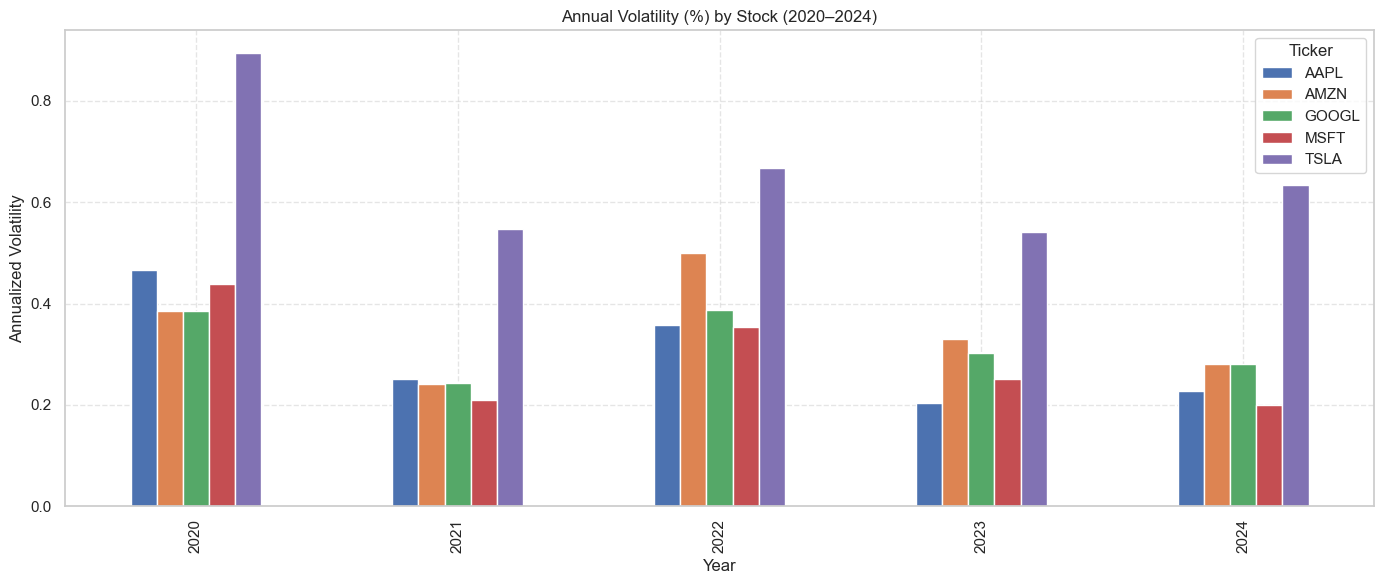

In [21]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Calculate annualized volatility per year (standard deviation * sqrt(252))
volatility_annual = daily_returns.resample('YE').std() * (252 ** 0.5)

# Rename index to year
volatility_annual.index = volatility_annual.index.year

# Print volatility
print(volatility_annual.round(2))

# Plot volatility comparison
plt.figure(figsize=(10, 6))
volatility_annual.plot(kind='bar')
plt.title('Annual Volatility (%) by Stock (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Annualized Volatility')
plt.legend(title='Ticker')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('outputs_graficos_eda/volatility_annual_comparison.png')
plt.show()

🔍 Insights:

Tesla (TSLA) was consistently the most volatile stock each year, significantly more than the others.

2020 was a highly volatile year overall (likely due to the pandemic onset), especially for Apple and Tesla.

2021 saw much lower volatility across the board — a relatively stable year in the market.

2022 showed a sharp increase in volatility, reflecting economic uncertainty, rising interest rates, and inflation concerns.

2023 and 2024 were calmer years in terms of market behavior, though Tesla remained highly volatile, even when other stocks became more stable.

## Annualized volatility (2020-2024)¶

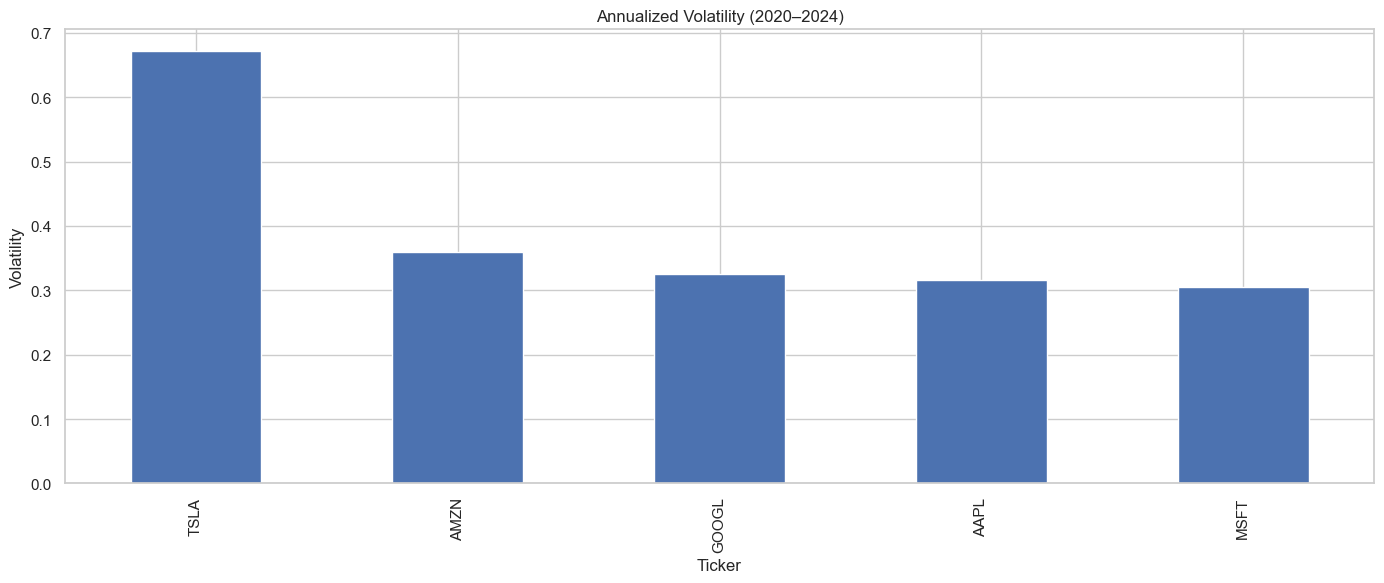

Volatility analysis completed and saved.


In [24]:
# Calculate annualized volatility from daily returns
volatility = returns.std() * np.sqrt(252)  # Approx. 252 business days in a year

# View volatility sorted from highest to lowest
volatility.sort_values(ascending=False).plot(kind='bar', title='Annualized Volatility (2020–2024)')
plt.ylabel('Volatility')
plt.tight_layout()
plt.savefig('outputs/graphs/volatilidad_tech.png')
plt.show()

# Save the volatility table to outputs/tables
volatility.to_csv('outputs/tables/volatilidad_tech.csv')

print("Volatility analysis completed and saved.")

Tesla (TSLA) exhibited the highest volatility (67.18%), indicating greater price fluctuations and higher risk. Amazon (AMZN) followed with moderate volatility (35.96%). In contrast, Microsoft (MSFT), Apple (AAPL), and Alphabet (GOOGL) showed more stable performance (30–32%), reflecting lower investment risk.



## 3.3 Calculation of descriptive statistics for daily returns

In [27]:
from scipy.stats import skew, kurtosis

# Calculate statistics for each ticker
mean_returns = daily_returns.mean()
volatility = daily_returns.std()
skewness = daily_returns.apply(skew)
kurtosis_ = daily_returns.apply(kurtosis)

# Create summary in DataFrame
summary_stats = pd.DataFrame({
    'Mean Daily Return': mean_returns,
    'Volatility (Std Dev)': volatility,
    'Skewness': skewness,
    'Kurtosis': kurtosis_
})

summary_stats = summary_stats.round(4)
print(summary_stats)

        Mean Daily Return  Volatility (Std Dev)  Skewness  Kurtosis
Ticker                                                             
AAPL               0.0012                0.0200    0.1055    5.2521
AMZN               0.0009                0.0227    0.0704    3.9749
GOOGL              0.0010                0.0205   -0.0558    3.5650
MSFT               0.0010                0.0192   -0.0168    7.0873
TSLA               0.0030                0.0423    0.2121    3.1031


### Interpretation of the statistical summary (2020–2024)

The table shows the main descriptive statistics calculated from the adjusted daily returns of five technology companies.

• Mean Daily Return:
Tesla (TSLA) has the highest mean daily return (0.0030), indicating greater average daily growth over the analyzed period. Apple (AAPL) has a mean daily return of 0.0012, followed by Google (GOOGL) and Microsoft (MSFT) with 0.0010, and Amazon (AMZN) with 0.0009. This suggests that Tesla offered the highest average daily return but, as we will see, with higher volatility.

• Volatility (Standard Deviation):
TSLA also shows the highest volatility (0.0423), nearly twice that of the other stocks, indicating that its price is much more unstable and risky. Amazon (0.0227) has the second highest volatility, while Microsoft (0.0192) and Apple (0.0200) are the most stable.

• Skewness:
Most stocks have skewness values close to zero, indicating relatively symmetric distributions of daily returns. Tesla (0.2121) and Apple (0.1055) show slight positive skewness, suggesting a tendency towards more positive daily returns, though with some asymmetry. Google and Microsoft present very slight negative skewness, indicating returns slightly tilted toward small losses.

• Kurtosis:
All assets show kurtosis values greater than 3, indicating heavy tails (more extreme events than predicted by a normal distribution). Microsoft has the highest kurtosis (7.0872), suggesting a higher frequency of extreme returns, while Tesla has the lowest kurtosis (3.1031) within this group, though it still indicates heavy tails.

Summary:

Tesla stands out for having the highest mean daily return but also the highest volatility and skewness, showing a profile of higher risk and potential reward. Microsoft and Apple are the stocks with the lowest volatility and greater stability in daily returns, although with a higher probability of extreme events according to kurtosis.

## Annual return comparison per stock (2020–2024)

Ticker   AAPL   AMZN  GOOGL   MSFT    TSLA
Date                                      
2021    34.65   2.38  65.30  52.48   49.76
2022   -26.40 -49.62 -39.09 -28.02  -65.03
2023    49.01  80.88  58.32  58.19  101.72
2024    30.71  44.39  36.01  12.93   62.52


<Figure size 1000x600 with 0 Axes>

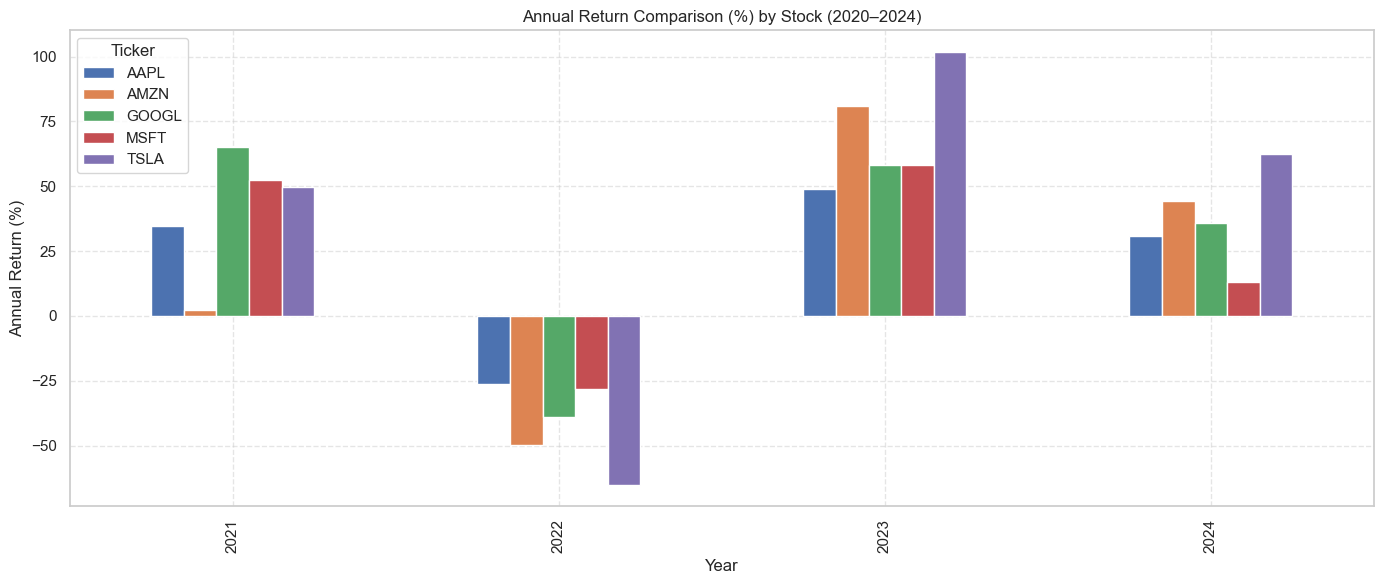

In [30]:
# Calculate annual returns: percentage change from last day of each year
annual_returns = data.resample('YE').last().pct_change().dropna() * 100

# Rename index to year only
annual_returns.index = annual_returns.index.year

# Print the annual return table
print(annual_returns.round(2))

# Plot annual return comparison
plt.figure(figsize=(10, 6))
annual_returns.plot(kind='bar')
plt.title('Annual Return Comparison (%) by Stock (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Annual Return (%)')
plt.legend(title='Ticker')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save plot (optional)
plt.savefig('outputs_graficos_eda/annual_returns_comparison.png')
plt.show()

📌 What i observed:

2021: It was a very positive year for all stocks, especially Google (+65%) and Microsoft (+52%).

2022: All stocks fell sharply, with Amazon (-49%) and Tesla (-65%) particularly notable. This likely reflects the impact of interest rate hikes, inflation, and capital outflows from tech.

2023: Impressive recovery, especially for Tesla (+101%) and Amazon (+80%).

2024: Good overall performance, although more moderate. Tesla remains strong at +62%, while Microsoft shows the lowest return (+12%).

## Cumulative returns (2020-2024)

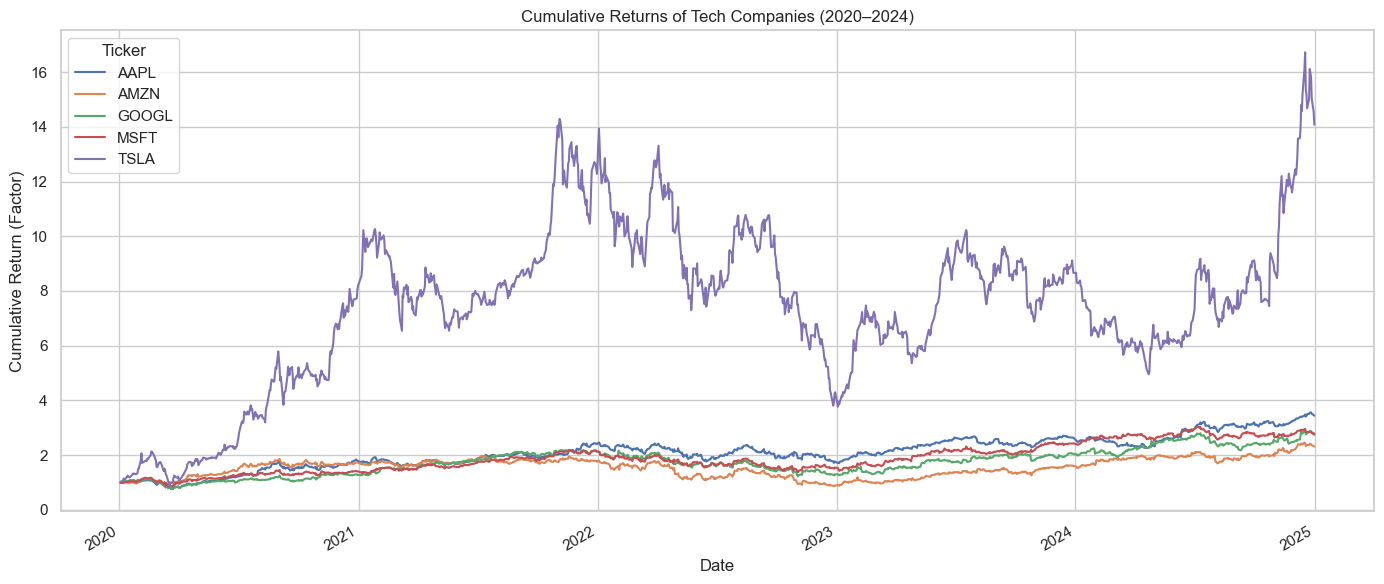

Cumulative returns analysis completed and saved.


In [33]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Graphing cumulative returns
cumulative_returns.plot(title='Cumulative Returns of Tech Companies (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Factor)')
plt.legend(title='Ticker')
plt.tight_layout()

# Save graphs in outputs/graphs
plt.savefig('outputs/graphs/retornos_acumulados_tech.png')
plt.show()

# Save tables
cumulative_returns.to_csv('outputs/tables/retornos_acumulados_tech.csv')

print("Cumulative returns analysis completed and saved.")

📈 Cumulative Returns Analysis (2020–2024)

Among the five companies analyzed, Tesla (TSLA) stands out with a significantly higher cumulative return, reaching over 16x its initial value at certain points during the period. This reflects explosive growth—paired with high volatility—that clearly outpaced the rest of the tech sector.
In contrast, Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), and Alphabet (GOOGL) followed more stable and closely aligned trajectories, with cumulative returns ranging between 2x and 3x. These companies presented a more conservative growth profile, suitable for lower-risk investment strategies.
The chart also highlights that despite its high returns, Tesla experienced several major drawdowns, indicating that investing in TSLA requires a higher risk tolerance.

This analysis is useful for understanding the risk-return trade-off when building a diversified portfolio in the tech sector.

## Final returns (Total return from 2020 to 2024)

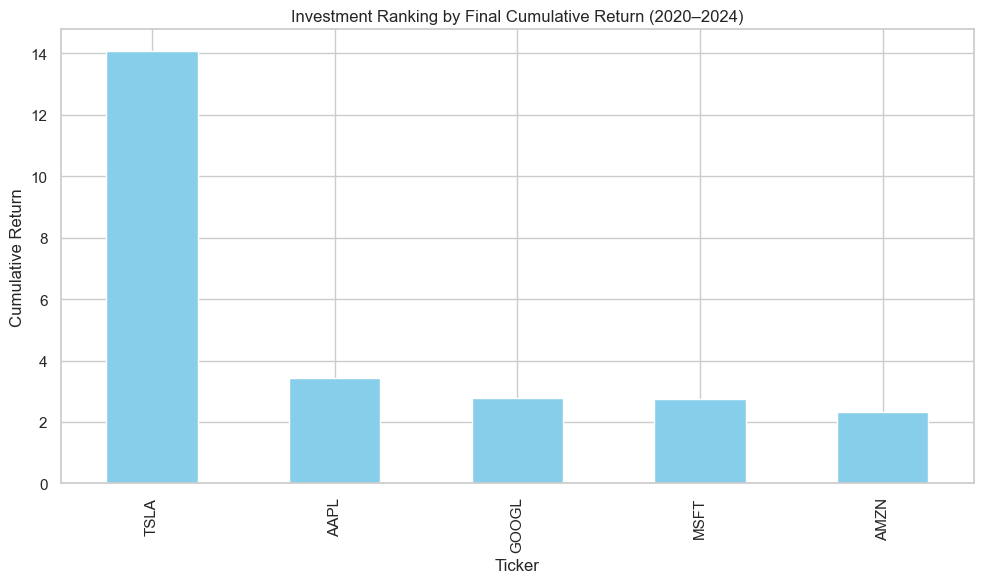

In [36]:
# Final returns (cumulative return at the end of period)
final_returns = cumulative_returns.iloc[-1].sort_values(ascending=False)

# Annualized volatility
volatility = returns.std() * np.sqrt(252)

# Drawdown calculation
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = (returns.mean() * 252) / (returns.std() * np.sqrt(252))

# Create summary table
summary_table = pd.DataFrame({
    'Final Return': final_returns,
    'Volatility': volatility,
    'Max Drawdown': max_drawdown,
    'Sharpe Ratio': sharpe_ratio
})

# Sort table by Final Return
summary_table = summary_table.sort_values(by='Final Return', ascending=False)

# Plot: Final Return Ranking
plt.figure(figsize=(10,6))
final_returns.plot(kind='bar', color='skyblue')
plt.title('Investment Ranking by Final Cumulative Return (2020–2024)')
plt.ylabel('Cumulative Return')
plt.xlabel('Ticker')
plt.tight_layout()
plt.savefig('outputs/graphs/ranking_final.png')
plt.show()

# Save summary table
summary_table.to_csv('outputs/tables/summary_table.csv')

Analysis and conclusions

• Return vs Volatility

TSLA had the highest final return (around 1408%), but also the highest volatility (67%), showing that it’s a high-risk, high-reward stock. In contrast, MSFT and AAPL had more moderate returns (around 2.7 to 3.4 times) and lower volatility (about 30%), indicating a more stable performance. This clearly reflects the risk-return tradeoff.

• Sharpe Ratio and Risk-Adjusted Performance

TSLA also has the highest Sharpe Ratio (1.12), meaning it compensated for its risk better than the others despite the volatility. AAPL and MSFT have solid Sharpe Ratios above 0.8, which is good. AMZN had the lowest Sharpe (~0.65), showing its returns didn’t fully justify the risk taken.

• Maximum Drawdown

TSLA experienced a maximum drawdown of 73%, meaning it had significant dips along the way. AAPL and MSFT had more moderate drawdowns (31-37%), which might be more appealing to risk-averse investors.

• Correlation Between Stocks

AAPL, MSFT, GOOGL, and AMZN are highly correlated (above 0.59), so they tend to move together. TSLA is less correlated (0.40-0.48), which could help diversify a tech-focused portfolio.

📌 Recommendations:
Even though TSLA has the highest return and Sharpe Ratio, its high volatility and drawdown make it risky. Combining it with more stable stocks like AAPL or MSFT can help balance risk and reward. It’s important not to focus only on returns but also on metrics like Sharpe Ratio and drawdown to get a clearer picture of risk. Including less correlated stocks can improve diversification and reduce overall portfolio volatility.

## 3.5 Sharpe ratio analysis (2020–2024)

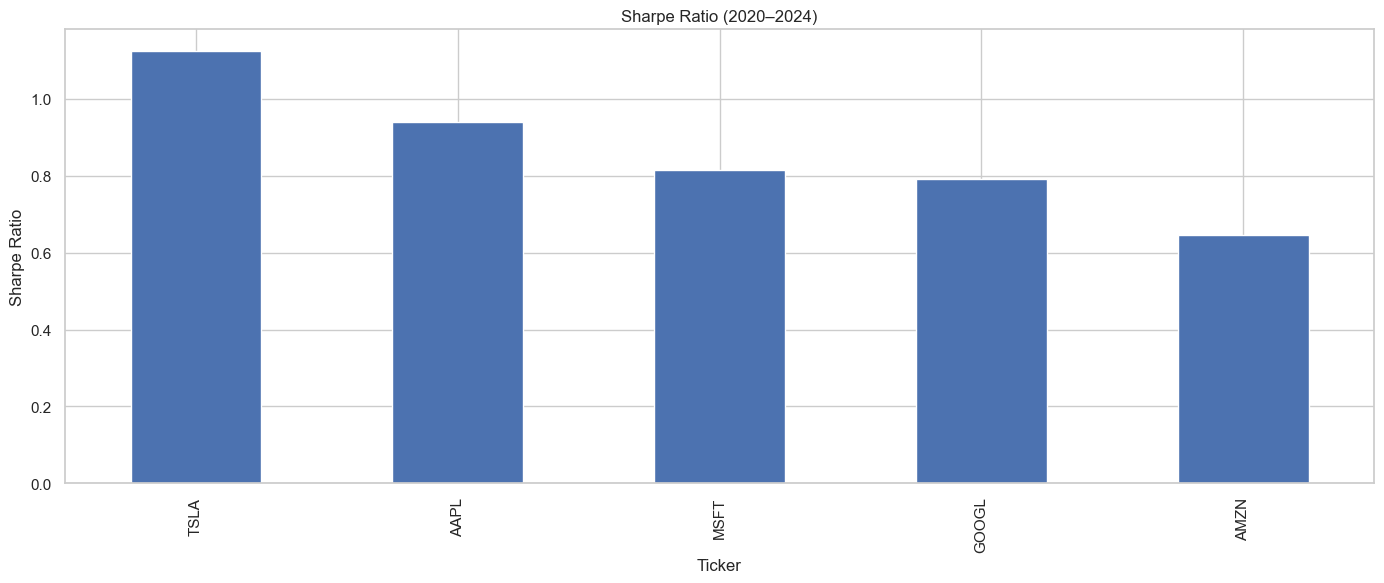

Sharpe Ratio analysis completed and saved.


In [39]:
# Calculate Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

# Sort and plot
sharpe_ratio.sort_values(ascending=False).plot(kind='bar', title='Sharpe Ratio (2020–2024)')
plt.ylabel('Sharpe Ratio')
plt.tight_layout()
plt.savefig('outputs/graphs/sharpe_ratio_tech.png')
plt.show()

# Save table
sharpe_ratio.to_csv('outputs/tables/sharpe_ratio_tech.csv')

print("Sharpe Ratio analysis completed and saved.")

📈 Interpretation of Sharpe Ratio (2020–2024)

The Sharpe Ratio measures risk-adjusted return. The higher the ratio, the better the investment’s return relative to the amount of risk taken.

🔍 Key insights:

• TSLA had the highest Sharpe Ratio (1.12), indicating it offered the best return per unit of risk, despite its high volatility.

• AAPL showed a strong Sharpe Ratio (0.94), making it a solid and efficient investment.

• MSFT and GOOGL had intermediate values (0.82 and 0.79, respectively), suggesting a balanced risk-return performance.

• AMZN had the lowest ratio (0.65), meaning its returns didn’t compensate for the risk as effectively as the others.

📌 Conclusion:
This analysis shows that Tesla delivered the highest risk-adjusted returns, while Apple and Microsoft stood out for their stability and efficiency. Amazon, on the other hand, underperformed relative to the risk taken, which may influence portfolio decisions depending on the investor's risk tolerance.

## ⚖️ Scatter Plot Risk vs. Return

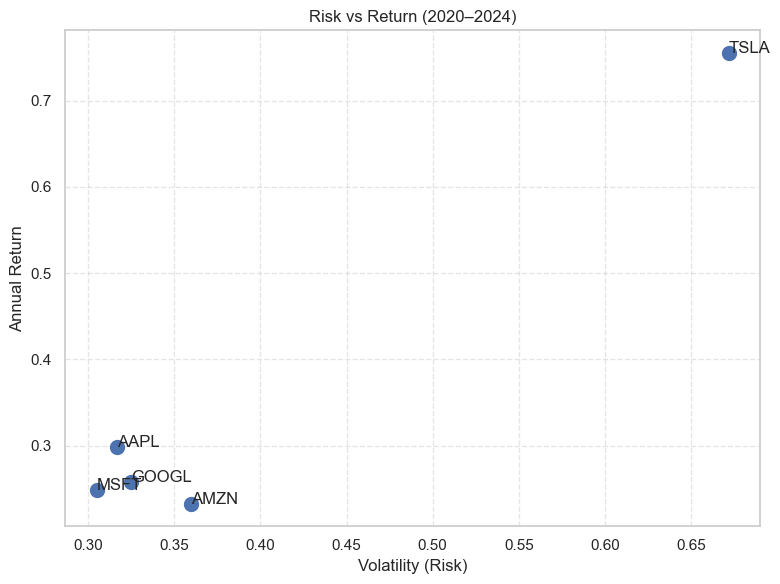

In [42]:
# Mean and std dev of daily returns (annualized)
mean_returns = daily_returns.mean() * 252
std_returns = daily_returns.std() * (252 ** 0.5)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(std_returns, mean_returns, s=100)

# Annotate each point
for ticker in tickers:
    plt.annotate(ticker, (std_returns[ticker], mean_returns[ticker]), fontsize=12)

plt.title('Risk vs Return (2020–2024)')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Annual Return')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('outputs_graficos_eda/risk_vs_return_scatter.png')
plt.show()

Risk vs Return (2020–2024)

This scatter plot compares the average annual return and volatility of AAPL, AMZN, GOOGL, MSFT, and TSLA.

•	TSLA stands out with the highest return and highest risk, showing a classic high-risk, high-reward profile.

•	AAPL and MSFT offer solid returns with low volatility, making them attractive for balanced investors.

•	GOOGL and especially AMZN show lower returns with higher risk, appearing less efficient over this period.

Conclusion: AAPL and MSFT provided the best risk-adjusted performance, while TSLA had the highest growth potential with greater risk.

## 3.6 Drawdown analysis (Maximum losses from peak)
The drawdown measures the decline of a stock from its historical peak over time. It helps assess the potential risk or worst-case scenario an investor might have experienced.

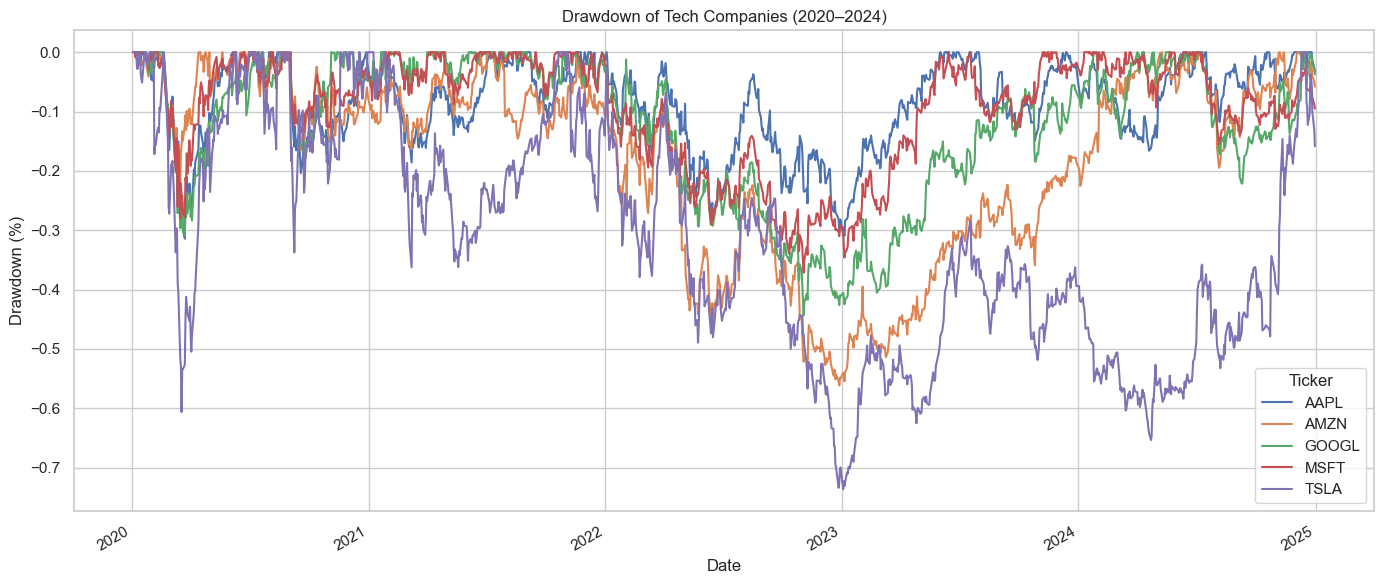

Drawdown analysis completed and saved.


In [45]:
# Calculate drawdown 
rolling_max = cumulative_returns.cummax()
drawdown = cumulative_returns / rolling_max - 1

# Graph drawdown
drawdown.plot(title='Drawdown of Tech Companies (2020–2024)')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend(title='Ticker')
plt.tight_layout()
plt.savefig('outputs/graphs/drawdown_tech.png')
plt.show()

# Save table
drawdown.to_csv('outputs/tables/drawdown_tech.csv')

print("Drawdown analysis completed and saved.")

📉 Interpretation of Drawdown for Tech Companies (2020–2024)

The chart displays the daily drawdown of five major U.S. technology companies: Apple (AAPL), Amazon (AMZN), Google (GOOGL), Microsoft (MSFT), and Tesla (TSLA) from 2020 to 2024.
Drawdown measures the percentage drop from a stock’s peak value to its subsequent lowest point. The lower the drawdown, the more significant the loss from the peak.

Key Observations:

• Tesla experienced the largest drawdowns, reaching up to -70% from peak values. This highlights Tesla’s high volatility and risk despite its strong return potential.

• Amazon and Google also showed notable drawdowns, around -50%, particularly during 2022 and parts of 2023, likely reflecting market corrections and broader economic uncertainty.

• Apple and Microsoft had more stable profiles, with drawdowns generally between -20% to -30%, indicating their relatively defensive nature in the tech sector.

📌 Conclusion:
Drawdown analysis offers a clear view of each stock’s historical risk exposure.
Investors seeking stability may favor Microsoft or Apple, while those pursuing higher returns (and accepting higher risk) might consider Tesla.

## 3.7 Heatmap of correlation between stocks (2020–2024)

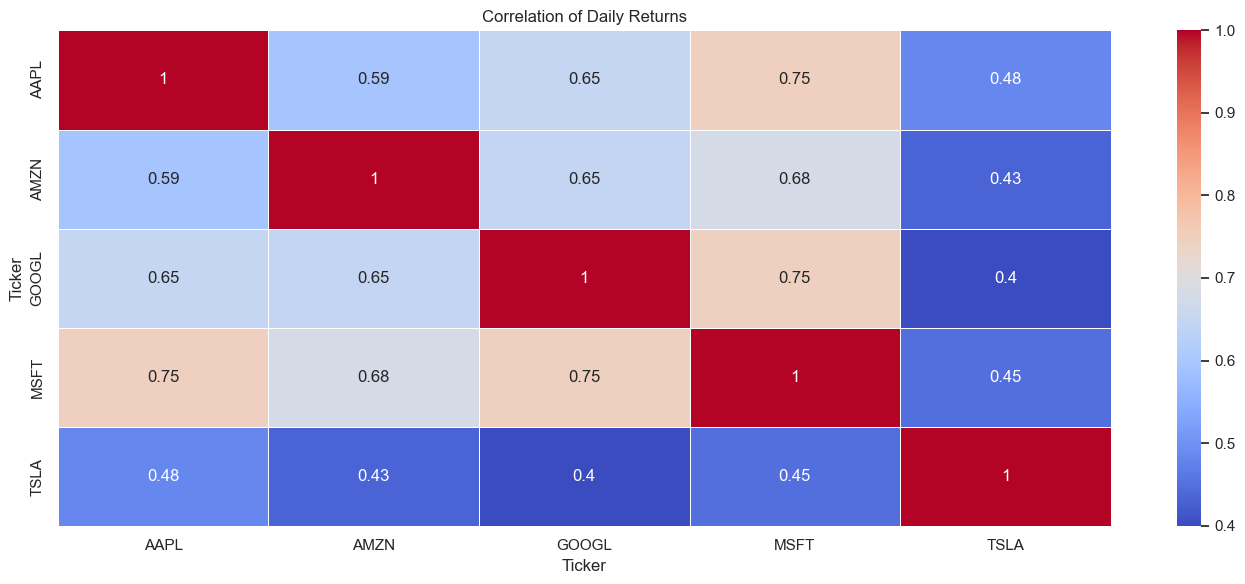

Correlation analysis completed and saved.


In [51]:
# Calculate correlation matrix
corr_matrix = returns.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Daily Returns')
plt.tight_layout()
plt.savefig('outputs/graphs/correlacion_tech.png')
plt.show()

# Save correlation table
corr_matrix.to_csv('outputs/tables/correlacion_tech.csv')
print("Correlation analysis completed and saved.")

🔗 Interpretation: Correlation of Daily Returns (2020–2024)

Microsoft (MSFT) and Apple (AAPL) show a strong positive correlation (0.75), indicating their stock prices often move in the same direction. Overall, the tech stocks—except Tesla (TSLA)—exhibit moderate to strong correlations, suggesting similar market influences. Tesla stands out with weaker correlations to the rest, reflecting its unique risk profile and more independent price movements.

## 🧾 4. Summary and Key Insights

This initial exploratory analysis evaluated the historical performance of five major tech stocks — Apple (AAPL), Amazon (AMZN), Google (GOOGL), Microsoft (MSFT), and Tesla (TSLA) — over the 2020–2024 period. The study focused on key market metrics, including returns, volatility, correlation, and risk-adjusted performance.

Main Findings

•	Annual Returns:
2023 and 2024 were strong years across the board, with TSLA and AMZN leading in absolute returns.
2022 was uniformly negative, reflecting broader macroeconomic headwinds.	

•	Volatility:
TSLA exhibited consistently high volatility, reinforcing its speculative and high-risk profile.
AAPL and MSFT stood out for their lower risk and return stability.

•	Correlations:
Stocks were highly correlated, especially during volatile market phases — a critical consideration for portfolio diversification.

•	Risk-Return Tradeoff:
Higher returns were generally associated with higher volatility. TSLA showed extreme values on both axes.

•	Sharpe Ratios (Risk-Adjusted Performance):
2023 delivered the best Sharpe ratios across all assets.
GOOGL and MSFT outperformed in 2021.
2022 showed negative Sharpe ratios for all, indicating poor compensation for risk.

•	Daily Return Distributions (Boxplots):
TSLA showed the widest spread and most outliers, consistent with its volatility.
MSFT and AAPL had narrower, more symmetric distributions, suggesting more predictable price behavior.


✅ Final Thoughts

This analysis establishes a strong foundation for understanding the behavior and dynamics of these key tech stocks.
Notably, MSFT, AAPL, and GOOGL demonstrated consistent and efficient risk-adjusted performance, making them attractive for conservative or long-term investors.
Conversely, TSLA offers high return potential but with significant volatility, better suited for high-risk portfolios.
These insights will directly inform the next project phase: technical indicators, anomaly detection, and trading signal generation.